In [298]:
# Importamos librerías

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

En esta ocasión, haremos uso de mediciones realizadas en electrocardiogramas. Particularmente, nos interesará las distancias entre los puntos fiduciales más relevantes y la extensión de las curvas P y T.

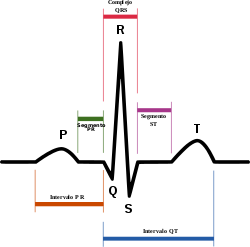

In [358]:
# Obtenemos la base de datos y la matriz X
data =  pd.read_csv('arrhythmia.data', sep=",", header=None)
X = data.iloc[:, 4:9]
X.columns = ['QRS', 'PQ', 'QT', 'T', 'P']
print(X)

     QRS   PQ   QT    T    P
0     91  193  371  174  121
1     81  174  401  149   39
2    138  163  386  185  102
3    100  202  380  179  143
4     88  181  360  177  103
..   ...  ...  ...  ...  ...
447   80  199  382  154  117
448  100  137  361  201   73
449  108  176  365  194  116
450   93  106  386  218   63
451   79  127  364  138   78

[452 rows x 5 columns]


El vector "y", tiene una serie de etiquetas determinadas por el diagnóstico médico asociado a las mediciones. Por simplicidad, solo nos enfocaremos en distinguir entre exámenes normales de aquellos considerados "No normales".

In [339]:
# Obtenemos la etiqueta "y"
Y = data.iloc[:, -1]
print('Antiguas etiquetas:')
print(Y.head(10))
y = []
for j in (Y):
    # Sabemos que solo las mediciones con etiqueta 1 equivalen a exámenes normales
    if int(j) != 1:
        y.append(0)
    else:
        y.append(1)
print('Nuevas etiquetas:')
print(y[:10])

Antiguas etiquetas:
0     8
1     6
2    10
3     1
4     7
5    14
6     1
7     1
8     1
9    10
Name: 279, dtype: int64
Nuevas etiquetas:
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0]


Ahora tenemos con etiqueta 1 los exámenes normales y con etiqueta 0 a los que presentan algún diagnóstico alternativo.

In [340]:
y.count(1), y.count(0)

(245, 207)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)

OJO! el parámetro C se puede definir de forma empírica. Trade off entre complejidad de modelo y cantidad de errores de clasificación permitidos:

- C muy alto: Menos complejo y menos errores de clasificación, pero se arriesga sobreajuste.
- C muy bajo: Más complejo, más errores de clasificación, pero se arriesga subajuste.

In [342]:
clf_linear = svm.SVC(kernel='linear', C=1)
clf_rbf = svm.SVC(kernel='rbf', C=1)
clf_poly = svm.SVC(kernel='poly', C=1)

In [343]:
clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)
clf_poly.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [344]:
y_pred_linear = clf_linear.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)
y_pred_poly = clf_poly.predict(X_test)

In [345]:
print(f'Precisión Kernel Lineal: {clf_linear.score(X_test, y_test)}')
print(f'Precisión Kernel Radial basis function: {clf_rbf.score(X_test, y_test)}')
print(f'Precisión Kernel Polinomial: {clf_poly.score(X_test, y_test)}')

Precisión Kernel Lineal: 0.7608695652173914
Precisión Kernel Radial basis function: 0.717391304347826
Precisión Kernel Polinomial: 0.7391304347826086


¡SUPER! ya tenemos una precisión aceptable para predecir exámenes anormales o normales, pero... ¿Hemos considerado si las etiquetas están desbalanceadas? 
A continuación utilizaremos un método de Undersampling denominado Tomek Links

In [346]:
from imblearn.under_sampling import TomekLinks


tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)
print(y_res.count(1), y_res.count(0))

212 207


In [347]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.1, random_state = 1)

In [348]:
clf_linear_res = svm.SVC(kernel='linear', C=1)
clf_rbf_res = svm.SVC(kernel='rbf', C=1)
clf_poly_res = svm.SVC(kernel='poly', C=1)

In [349]:
clf_linear_res.fit(X_train_res, y_train_res)
clf_rbf_res.fit(X_train_res, y_train_res)
clf_poly_res.fit(X_train_res, y_train_res)

SVC(C=1, kernel='poly')

In [350]:
y_pred_linear_res = clf_linear_res.predict(X_test_res)
y_pred_rbf_res = clf_rbf_res.predict(X_test_res)
y_pred_poly_res = clf_poly_res.predict(X_test_res)

In [351]:
print(f'Precisión Kernel Lineal: {clf_linear.score(X_test_res, y_test_res)}')
print(f'Precisión Kernel Radial basis function: {clf_rbf.score(X_test_res, y_test_res)}')
print(f'Precisión Kernel Polinomial: {clf_poly.score(X_test_res, y_test_res)}')

Precisión Kernel Lineal: 0.7619047619047619
Precisión Kernel Radial basis function: 0.7380952380952381
Precisión Kernel Polinomial: 0.7380952380952381


Al comparar nuestras predicciones antes y después de realizar el proceso de Undersampling, se tiene:

In [352]:
from sklearn.metrics import classification_report


print('Kernel lineal ANTES de Undersampling')
print(classification_report(y_test, y_pred_linear))
print('Kernel lineal DESPUÉS de Undersampling')
print(classification_report(y_test_res, y_pred_linear_res))

Kernel lineal ANTES de Undersampling
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        18
           1       0.76      0.89      0.82        28

    accuracy                           0.76        46
   macro avg       0.76      0.72      0.73        46
weighted avg       0.76      0.76      0.75        46

Kernel lineal DESPUÉS de Undersampling
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.78      0.78      0.78        23

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



In [353]:
print('Kernel RBF (Radial Basis Function) ANTES de Undersampling')
print(classification_report(y_test, y_pred_rbf))
print('Kernel RBF (Radial Basis Function) DESPUÉS de Undersampling')
print(classification_report(y_test_res, y_pred_rbf_res))

Kernel RBF (Radial Basis Function) ANTES de Undersampling
              precision    recall  f1-score   support

           0       0.78      0.39      0.52        18
           1       0.70      0.93      0.80        28

    accuracy                           0.72        46
   macro avg       0.74      0.66      0.66        46
weighted avg       0.73      0.72      0.69        46

Kernel RBF (Radial Basis Function) DESPUÉS de Undersampling
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.69      0.87      0.77        23

    accuracy                           0.71        42
   macro avg       0.73      0.70      0.70        42
weighted avg       0.73      0.71      0.70        42



In [354]:
print('Kernel Polinomial ANTES de Undersampling')
print(classification_report(y_test, y_pred_poly))
print('Kernel Polinomial DESPUÉS de Undersampling')
print(classification_report(y_test_res, y_pred_poly_res))

Kernel Polinomial ANTES de Undersampling
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        18
           1       0.72      0.93      0.81        28

    accuracy                           0.74        46
   macro avg       0.76      0.69      0.69        46
weighted avg       0.75      0.74      0.72        46

Kernel Polinomial DESPUÉS de Undersampling
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.73      0.83      0.78        23

    accuracy                           0.74        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.74      0.74      0.73        42



En general, los valores más aceptables se obtienen para el caso de kernel lineal con Undersampling. Ahora bien, seguramente te preguntas "¿Y si quiero utilizar técnicas de Oversampling?"

In [355]:
from imblearn.over_sampling import SMOTE


sm = SMOTE()
X_oversm, y_oversm = sm.fit_resample(X, y)

print('Data original:', y.count(1), y.count(0))
print('Undersampling:', y_res.count(1), y_res.count(0))
print('Oversampling:', y_oversm.count(1), y_oversm.count(0))

Data original: 245 207
Undersampling: 212 207
Oversampling: 245 245


In [356]:
X_train_oversm, X_test_oversm, y_train_oversm, y_test_oversm = train_test_split(X_oversm, y_oversm, test_size=0.1, random_state = 1)
clf_linear_oversm = svm.SVC(kernel='linear', C=1)
clf_linear_oversm.fit(X_train_oversm, y_train_oversm)
y_pred_linear_oversm = clf_linear_oversm.predict(X_test_oversm)


In [357]:
print('Kernel lineal con Undersampling')
print(classification_report(y_test_res, y_pred_linear_res))
print('Kernel lineal con Oversampling')
print(classification_report(y_test_oversm, y_pred_linear_oversm))

Kernel lineal con Undersampling
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.78      0.78      0.78        23

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42

Kernel lineal con Oversampling
              precision    recall  f1-score   support

           0       0.78      0.52      0.62        27
           1       0.58      0.82      0.68        22

    accuracy                           0.65        49
   macro avg       0.68      0.67      0.65        49
weighted avg       0.69      0.65      0.65        49

